In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 70)
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

In [9]:
train_df = pd.read_csv("../data/train.csv")
train_df.columns = train_df.columns.str.lower()
test_df = pd.read_csv("../data/test.csv")
test_df.columns = test_df.columns.str.lower()

<IPython.core.display.Javascript object>

### Quick findings
- Test data does not have "state_6"
- Most correlated features: energy_star_rating
- Columns with missing 
   - year_built, energy_star_rating, direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog

In [3]:
print(train_df.shape)
print(train_df.columns)

(75757, 64)
Index(['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', '

In [3]:
avg_temp_columns = [col for col in train_df.columns if "avg_temp" in col]
max_temp_columns = [col for col in train_df.columns if "max_temp" in col]
min_temp_columns = [col for col in train_df.columns if "min_temp" in col]
days_below_columns = [col for col in train_df.columns if "days_below" in col]

<IPython.core.display.Javascript object>

In [6]:
train_df.head()

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [25]:
display(train_df["building_class"].value_counts())
display(test_df["building_class"].value_counts())

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

Commercial     5607
Residential    4098
Name: building_class, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
display(train_df["state_factor"].value_counts())
display(test_df["state_factor"].value_counts())

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: state_factor, dtype: int64

State_11    3268
State_4     2568
State_2     1515
State_8     1323
State_1     1027
State_10       4
Name: state_factor, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
train_df["facility_type"].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

<IPython.core.display.Javascript object>

In [16]:
# check columns that have missing
columns_that_have_missing = train_df.columns[train_df.isnull().sum() > 0]
print(train_df[columns_that_have_missing].notnull().sum())
display(train_df[columns_that_have_missing].head())

year_built                   73920
energy_star_rating           49048
direction_max_wind_speed     34675
direction_peak_wind_speed    33946
max_wind_speed               34675
days_with_fog                29961
dtype: int64


,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,1942.0,11.0,1.0,1.0,1.0,NaN
1,1955.0,45.0,1.0,NaN,1.0,12.0
2,1951.0,97.0,1.0,NaN,1.0,12.0
3,1980.0,46.0,1.0,NaN,1.0,12.0
4,1985.0,100.0,1.0,1.0,1.0,NaN


In [19]:
train_df.describe()

,year_factor,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30f,days_below_20f,days_below_10f,days_below_0f,days_above_80f,days_above_90f,days_above_100f,days_above_110f,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [6]:
target_columns = [
    "site_eui",
    "year_factor",
    "state_factor",
    "floor_area",
    "year_built",
    "energy_star_rating",
    "elevation",
    # "january_min_temp",
    # "january_avg_temp",
    # "january_max_temp",
    # "february_min_temp",
    # "february_avg_temp",
    # "february_max_temp",
    # "march_min_temp",
    # "march_avg_temp",
    # "march_max_temp",
    # "april_min_temp",
    # "april_avg_temp",
    # "april_max_temp",
    # "may_min_temp",
    # "may_avg_temp",
    # "may_max_temp",
    # "june_min_temp",
    # "june_avg_temp",
    # "june_max_temp",
    # "july_min_temp",
    # "july_avg_temp",
    # "july_max_temp",
    # "august_min_temp",
    # "august_avg_temp",
    # "august_max_temp",
    # "september_min_temp",
    # "september_avg_temp",
    # "september_max_temp",
    # "october_min_temp",
    # "october_avg_temp",
    # "october_max_temp",
    # "november_min_temp",
    # "november_avg_temp",
    # "november_max_temp",
    # "december_min_temp",
    # "december_avg_temp",
    # "december_max_temp",
    "cooling_degree_days",
    "heating_degree_days",
    "precipitation_inches",
    "snowfall_inches",
    "snowdepth_inches",
    "avg_temp",
    # "days_below_30f",
    # "days_below_20f",
    # "days_below_10f",
    # "days_below_0f",
    # "days_above_80f",
    # "days_above_90f",
    # "days_above_100f",
    # "days_above_110f",
    "direction_max_wind_speed",
    "direction_peak_wind_speed",
    "max_wind_speed",
    "days_with_fog",
]
len(target_columns)

17

<IPython.core.display.Javascript object>

In [10]:
test_df["year_built"].describe()

count    9613.000000
mean     1963.219598
std        40.819953
min         0.000000
25%      1929.000000
50%      1969.000000
75%      1994.000000
max      2016.000000
Name: year_built, dtype: float64

<IPython.core.display.Javascript object>

In [11]:
train_df["year_built"].describe()

count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

<IPython.core.display.Javascript object>

In [12]:
(train_df["year_built"] == 0).sum()

6

<IPython.core.display.Javascript object>

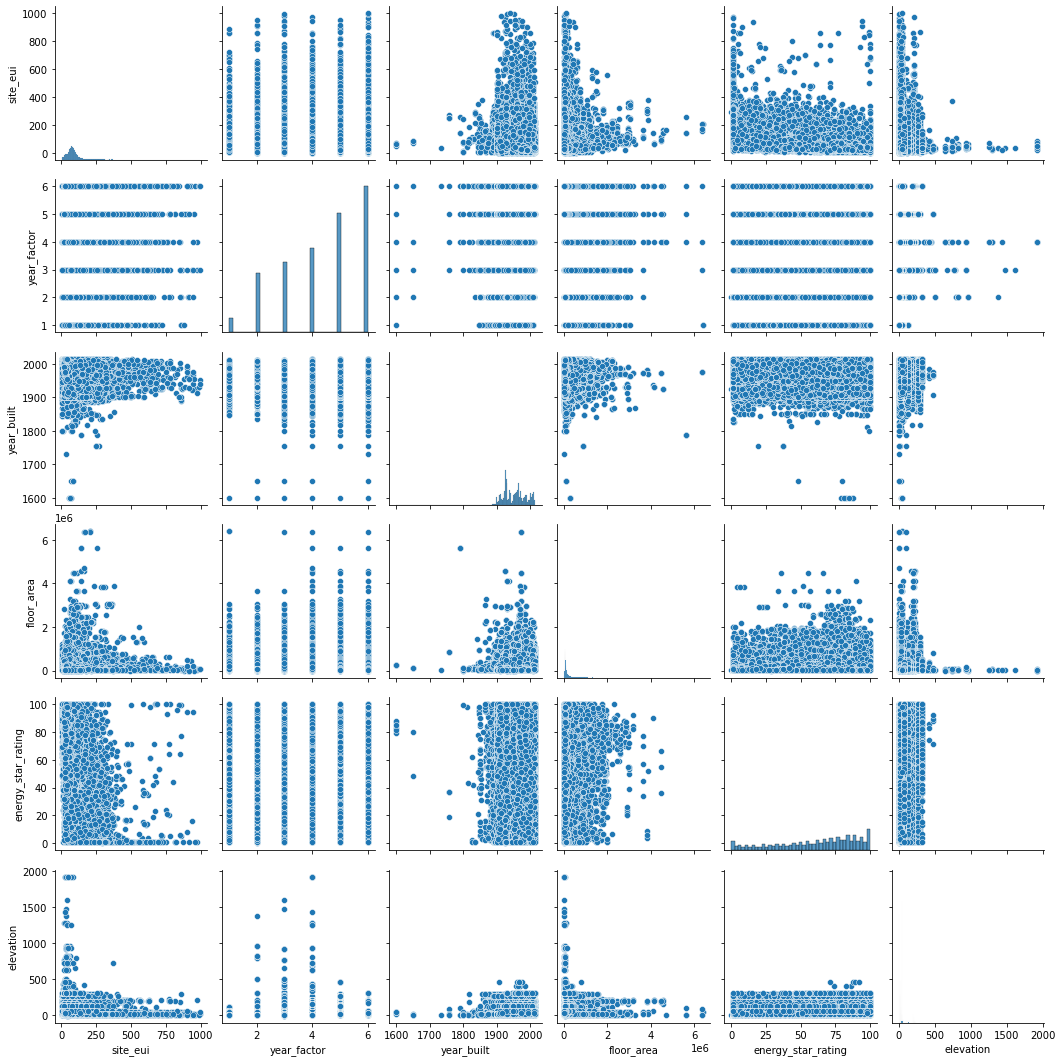

<IPython.core.display.Javascript object>

In [15]:
sns.pairplot(
    data=train_df.query("year_built !=0")[
        [
            "site_eui",
            "year_factor",
            "year_built",
            "floor_area",
            "energy_star_rating",
            "elevation",
        ]
    ]
)
plt.show()

In [31]:
corr_result = train_df[
    [
        "site_eui",
        "year_factor",
        "year_built",
        "floor_area",
        "energy_star_rating",
        "elevation",
        "cooling_degree_days",
        "heating_degree_days",
        "precipitation_inches",
        "snowfall_inches",
        "snowdepth_inches",
        "avg_temp",
        "direction_max_wind_speed",
        "direction_peak_wind_speed",
        "max_wind_speed",
        "days_with_fog",
    ]
].corr()
corr_result.query("site_eui > 0.1 or site_eui < -0.1").index

Index(['site_eui', 'energy_star_rating', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches'],
      dtype='object')

<IPython.core.display.Javascript object>

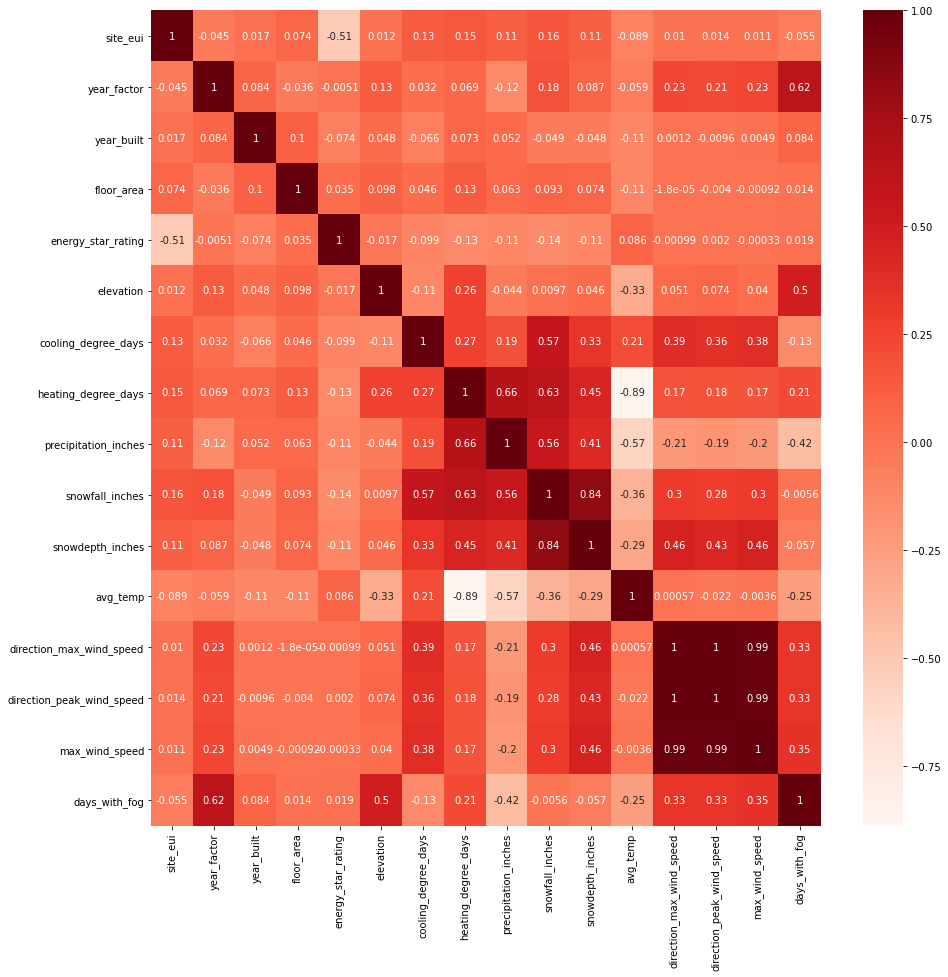

<IPython.core.display.Javascript object>

In [20]:
# train_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    train_df[
        [
            "site_eui",
            "year_factor",
            "year_built",
            "floor_area",
            "energy_star_rating",
            "elevation",
            "cooling_degree_days",
            "heating_degree_days",
            "precipitation_inches",
            "snowfall_inches",
            "snowdepth_inches",
            "avg_temp",
            "direction_max_wind_speed",
            "direction_peak_wind_speed",
            "max_wind_speed",
            "days_with_fog",
        ]
    ].corr(),
    annot=True,
    cmap="Reds",
    ax=ax,
)
plt.show()

### Temperature columns

In [ ]:
# avg_temp_columns = [col for col in train_df.columns if "avg_temp" in col]
# max_temp_columns = [col for col in train_df.columns if "max_temp" in col]
# min_temp_columns = [col for col in train_df.columns if "min_temp" in col]
# days_below_columns = [col for col in train_df.columns if "days_below" in col]

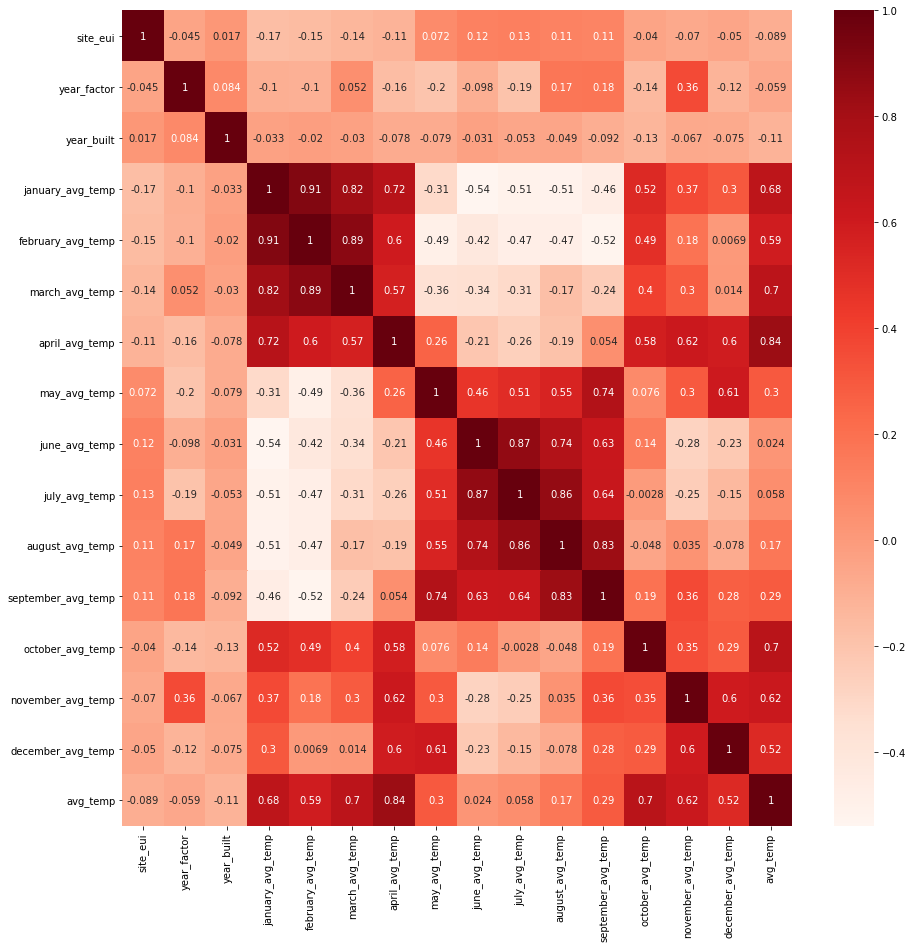

<IPython.core.display.Javascript object>

In [5]:
# train_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    train_df[
        [
            "site_eui",
            "year_factor",
            "year_built",
        ]
        + avg_temp_columns
    ].corr(),
    annot=True,
    cmap="Reds",
    ax=ax,
)
plt.show()

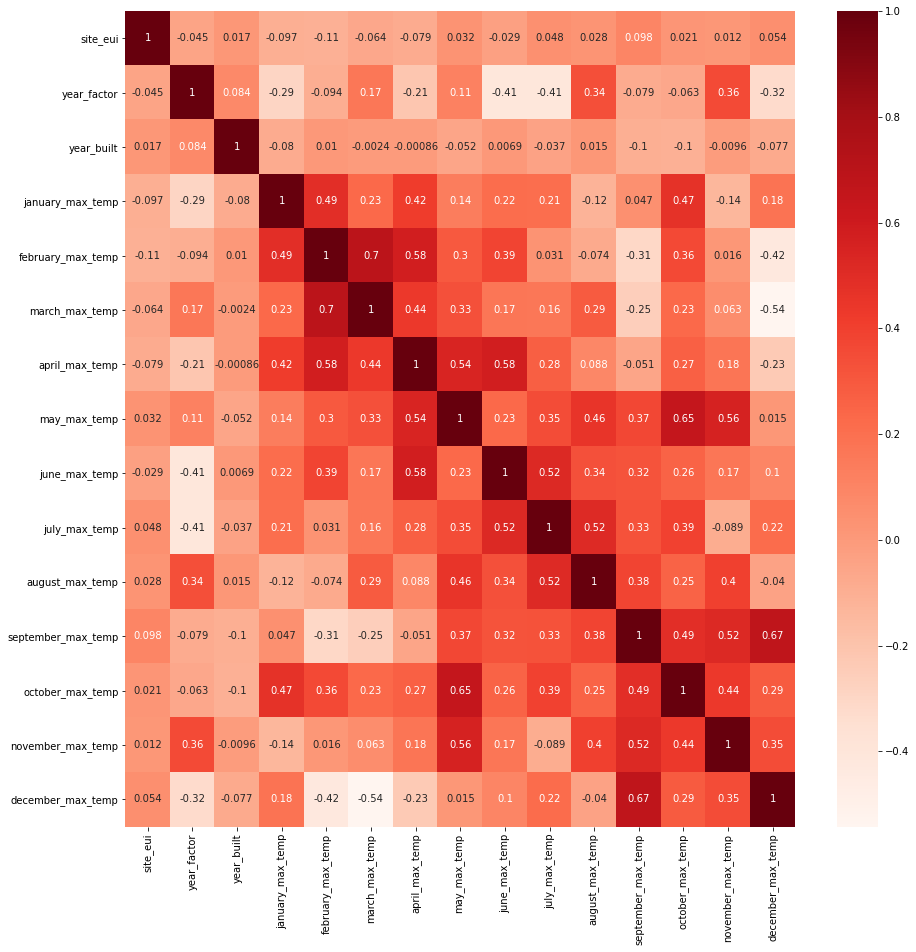

<IPython.core.display.Javascript object>

In [7]:
# train_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    train_df[
        [
            "site_eui",
            "year_factor",
            "year_built",
        ]
        + max_temp_columns
    ].corr(),
    annot=True,
    cmap="Reds",
    ax=ax,
)
plt.show()

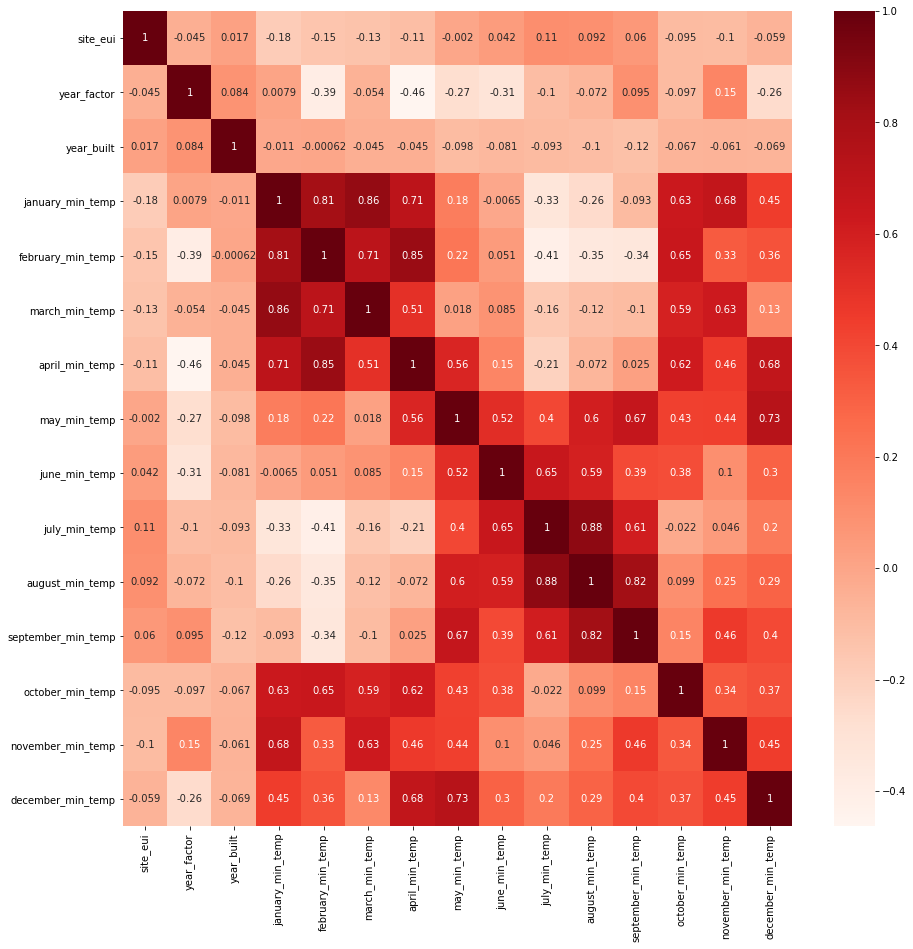

<IPython.core.display.Javascript object>

In [8]:
# train_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    train_df[
        [
            "site_eui",
            "year_factor",
            "year_built",
        ]
        + min_temp_columns
    ].corr(),
    annot=True,
    cmap="Reds",
    ax=ax,
)
plt.show()

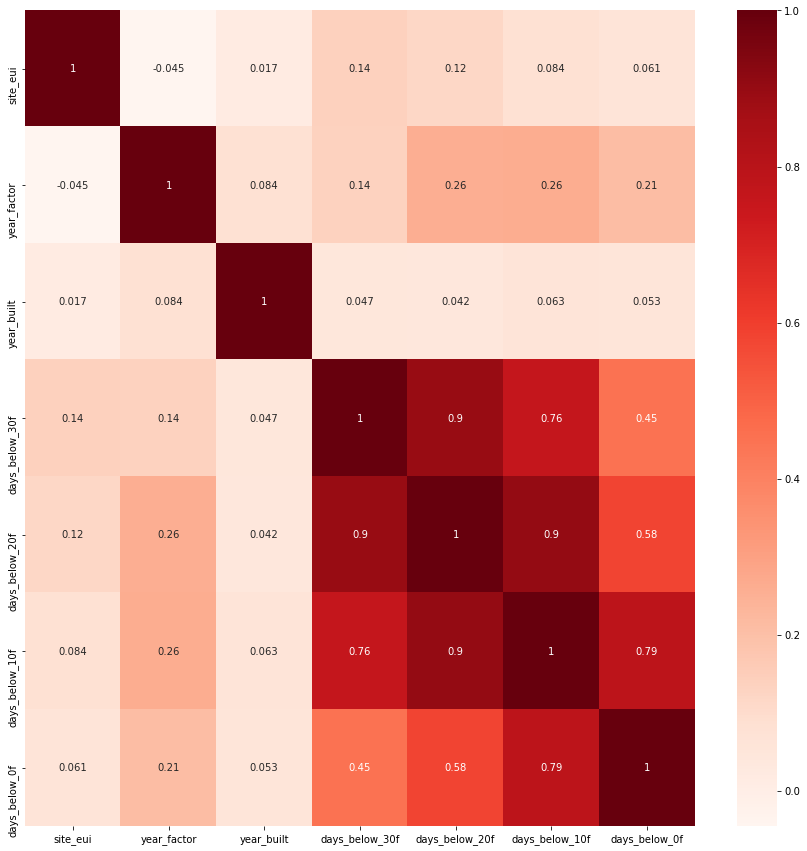

<IPython.core.display.Javascript object>

In [9]:
# train_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    train_df[
        [
            "site_eui",
            "year_factor",
            "year_built",
        ]
        + days_below_columns
    ].corr(),
    annot=True,
    cmap="Reds",
    ax=ax,
)
plt.show()